In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('Iris.csv')
df.head()
df.shape
df = df.drop(columns=['Id'], axis=1)
species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['SpeciesNo'] = df['Species']
df['SpeciesNo'] = [species[i] for i in df.SpeciesNo]
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesNo
81,5.5,2.4,3.7,1.0,Iris-versicolor,1
69,5.6,2.5,3.9,1.1,Iris-versicolor,1
79,5.7,2.6,3.5,1.0,Iris-versicolor,1
49,5.0,3.3,1.4,0.2,Iris-setosa,0
138,6.0,3.0,4.8,1.8,Iris-virginica,2


In [28]:
print(df.isnull().sum())
print(df.duplicated().sum())
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['SpeciesNo'], train_size=0.8, random_state=4)
df = pd.DataFrame(x_train)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
SpeciesNo        0
dtype: int64
3


In [73]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
kmeans.labels_
kmeans.cluster_centers_
print(kmeans.inertia_)
testPredict = kmeans.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, testPredict) * 100


63.360123249299726


86.66666666666667

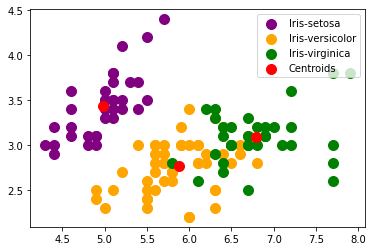

In [64]:
x = df.values
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Accuracy is maximum when number of clusters is 3 which is 86.66666666666667


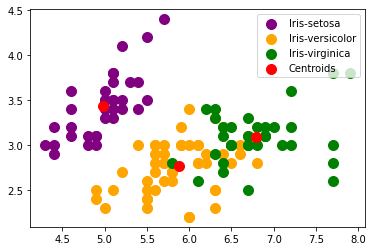

In [70]:
lst = []
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
	kmeans.labels_
	kmeans.cluster_centers_
	testPredict = kmeans.predict(x_test)
	from sklearn.metrics import accuracy_score
	acc = accuracy_score(y_test, testPredict) * 100
	lst.append([i, acc, kmeans])

abc = max(lst, key=lambda x: x[1])
print(f"Accuracy is maximum when number of clusters is {abc[0]} which is {abc[1]}")
kmeans = abc[2]
x = df.values
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [72]:
petallength = float(input("Enter petal length in cm: "))
sepallength = float(input("Enter sepal length in cm: "))
petalwidth = float(input("Enter petal width in cm: "))
sepalwidth = float(input("Enter sepal width in cm: "))

print(f"""
petalLength: {petallength}, 
sepallength: {sepallength}, 
petalwidth: {petalwidth}, 
sepalwidth: {sepalwidth}
""")

test = [[sepallength, sepalwidth, petallength, petalwidth]]
y = kmeans.predict(test)
if y[0] == 0:
	print('Iris-setosa')
elif y[0] == 1:
	print('Iris-versicolor')
elif y[0] == 2:
	print('Iris-virginica')


petalLength: 5.6, 
sepallength: 6.4, 
petalwidth: 2.2, 
sepalwidth: 2.8

iris-virginica
